<a href="https://colab.research.google.com/github/orhanaydinn/brainTumor_Alzheimer_Prediction/blob/main/BrainTumor_Alzheimer_Detection_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Uploaded Dataset**

In [11]:
!pip install -q gdown
import gdown

file_id = "1UsTHwppnuU4PpSNgS--cijrka4wixykJ"
url = f"https://drive.google.com/uc?id={file_id}"
output = "brain_disease_classification_dataset_v1.zip"

# fuzzy=True çok önemli!
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1UsTHwppnuU4PpSNgS--cijrka4wixykJ
From (redirected): https://drive.google.com/uc?id=1UsTHwppnuU4PpSNgS--cijrka4wixykJ&confirm=t&uuid=2a516bcc-0de5-41b9-9333-4c8a12b086ac
To: /content/brain_disease_classification_dataset_v1.zip
100%|██████████| 1.19G/1.19G [00:15<00:00, 77.3MB/s]


'brain_disease_classification_dataset_v1.zip'

brain_disease_classification_dataset.zip file upload manually.
```
zip_path = "/content/brain_disease_classification_dataset.zip_v1"
extract_path = "/content/brain_disease_classification_dataset_v1"
```
**zip_path** represents the file path of the uploaded ZIP file.

**extract_path** defines the destination directory where the contents of the ZIP file will be extracted.

In [13]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/brain_disease_classification_dataset_v1.zip"
extract_path = "/content/brain_disease_classification_dataset_v1"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)


Dataset successfully extracted to: /content/brain_disease_classification_dataset_v1


Check the loaded datasets before data preparation process.

In [ ]:
for root, dirs, files in os.walk(extract_path):
    print(f"\n{root}")
    for d in dirs:
        print(f"├── {d}")
    for f in files[:5]:
        print(f"├── {f}")


/content/brain_disease_classification_dataset_v1
├── brain_disease_classification_dataset_v1
├── best_cnn_model.h5
├── best_densenet121_model.keras
├── best_resnet50_model.h5
├── brain_disease_classification_dataset_v2.zip
├── best_effnet_model.keras

/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1
├── alzheimer_non_demented
├── tumor_yes
├── tumor_no
├── alzheimer_mild_demented
├── alzheimer_moderate_demented
├── alzheimer_very_mild_demented

/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1/alzheimer_non_demented
├── non_demented_2702.jpg
├── non_demented_3136.jpg
├── non_demented_713.jpg
├── non_demented_2824.jpg
├── non_demented_1658.jpg

/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1/tumor_yes
├── tumor_yes_5754.jpg
├── tumor_yes_2790.jpg
├── tumor_yes_5040.jpg
├── tumor_yes_3302.jpg
├── tumor_yes_2270.jpg

/content/brain_disease_classification_dataset_v1/brai

**` def show_random_images(dataset_dir, samples=3):`**
This function displays a random 3 sample images from each class.

**`img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`**
cv2 library create BGR images default setting. This code convert BGR to RGB.



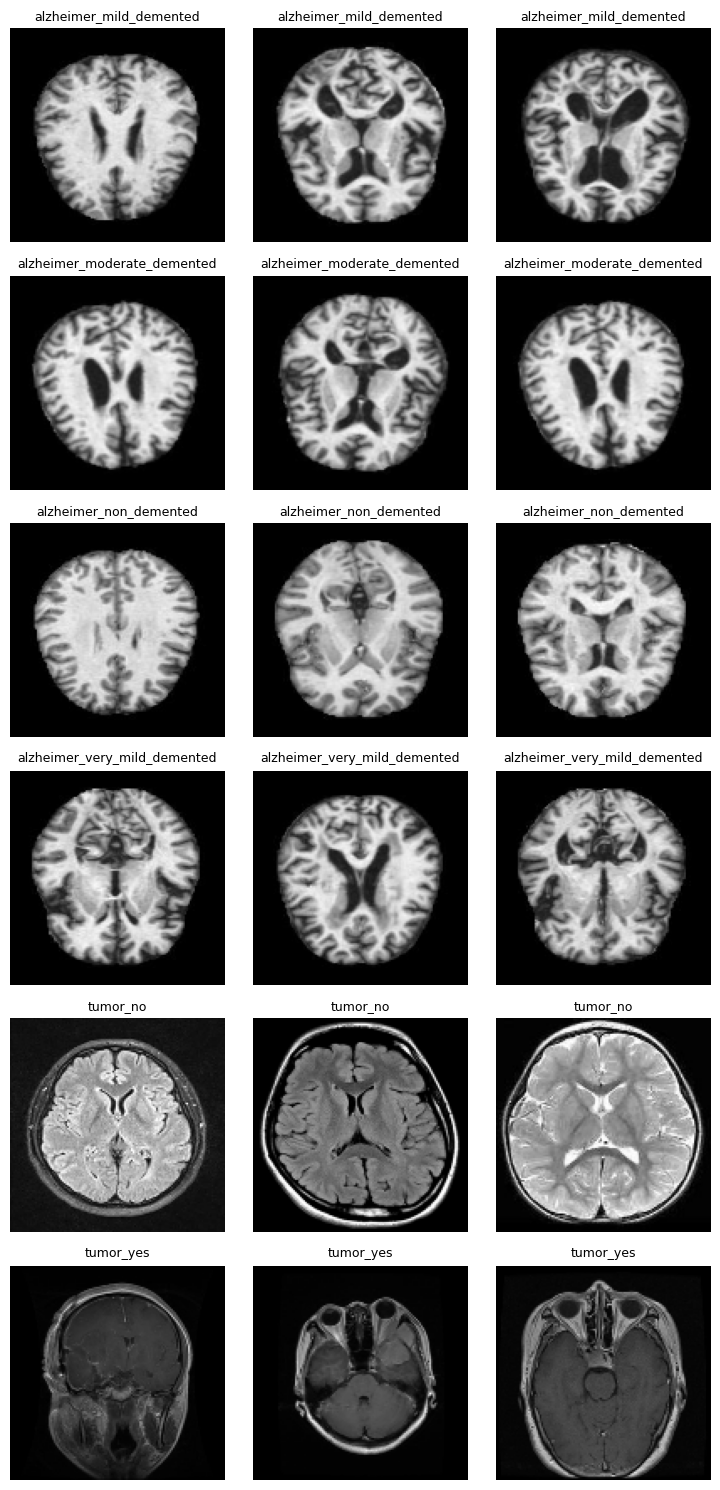

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = samples
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1", samples=3)


Check the dataset size before pre processing.

                              Image Count
alzheimer_mild_demented              2501
alzheimer_moderate_demented          3000
alzheimer_non_demented               3200
alzheimer_very_mild_demented         2240
tumor_no                             3598
tumor_yes                            6679


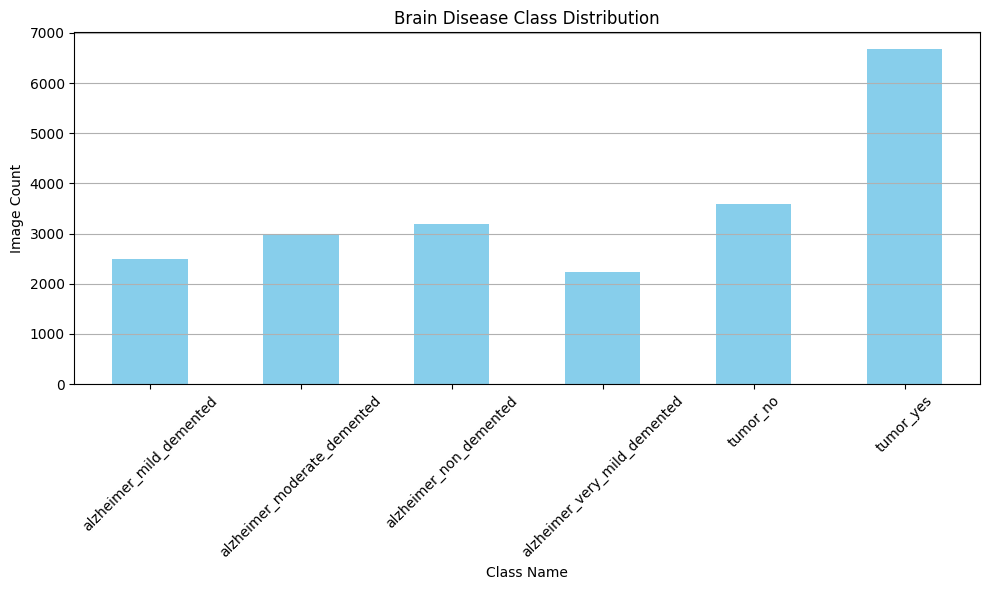

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


base_dir = "/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1"


def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(image_files)
    return class_counts


class_counts = count_images_in_folders(base_dir)


df_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])


print(df_counts)


df_counts.plot(kind="bar", figsize=(10, 6), legend=False, color="skyblue")
plt.title("Brain Disease Class Distribution")
plt.ylabel("Image Count")
plt.xlabel("Class Name")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **2 - Tumor Data Preparation & Preprocessing**

In this section, the data was examined and augmentation was applied to some labels.

*   2.1 - Load and Label Data
*   2.2 - Data Augmentation
    *   2.2.1 - Augmentation for **tumor_no** labels
*   2.3 - Show Augmentation Images
*   2.4 - Show Current Dataset
*   2.5 - Read, Resize and Convert Images to Arrays
*   2.6 - Convert to Numpy Arrays


## 2.1 - Load and Label Data

**`label_map = {label: idx for idx, label in enumerate(class_names)}`**

This code automatically detects the class folders in the dataset directory and maps each class to a unique integer.

In [ ]:
import os


DATASET_DIR = "/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1"


all_classes = sorted(os.listdir(DATASET_DIR))


alzheimer_classes = [c for c in all_classes if c.startswith("alzheimer")]
tumor_classes = [c for c in all_classes if c.startswith("tumor")]


label_map = {}

for idx, label in enumerate(alzheimer_classes):
    label_map[label] = idx

for idx, label in enumerate(tumor_classes):
    label_map[label] = idx + len(alzheimer_classes)

print("Label Mapping:", label_map)


Label Mapping: {'alzheimer_mild_demented': 0, 'alzheimer_moderate_demented': 1, 'alzheimer_non_demented': 2, 'alzheimer_very_mild_demented': 3, 'tumor_no': 4, 'tumor_yes': 5}


## 2.2 - Data Augmentation

### 2.2.1 - Tumor_NO Augmentation

`target_count = 6000` The target number of images was determined as 6000 and the current number of images was subtracted from this number `to_generate = target_count - current_count`.

`for img_name in tqdm(existing_images):` This function generated the required number of images.

```
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)
```


*   Every images was rotated 15°. `rotation_range=15`
*   Zoomed by 10% `zoom_range=0.1`.
*   Slightly shifted horizontally and vertically `width_shift_range=0.1,
height_shift_range=0.1`.
*   Brightness was adjusted between 80% and 120%. `brightness_range=[0.8,1.2]`
*   Some images were flipped horizontally. Empty areas were filled using the nearest pixel method. `horizontal_flip=True, fill_mode='nearest'`


` aug_name = f"aug_tumor_no_{image_idx}.jpg"` This code adds the names **aug_tumor_no_1, aug_tumor_no_2, ..... , aug_tumor_no_n** to the new images

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation ayarları
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

# Klasör ve hedef ayarları
target_count = 6000
input_folder = "/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1/tumor_no"
IMG_SIZE = 64

# Geçerli resimleri al
existing_images = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
current_count = len(existing_images)
to_generate = target_count - current_count

print(f"Current: {current_count} — Target: {target_count} — Generating: {to_generate}")

image_idx = 1
generated = 0

for img_name in tqdm(existing_images):
    if generated >= to_generate:
        break

    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.reshape((1, IMG_SIZE, IMG_SIZE, 3))

    aug_iter = datagen.flow(
        img,
        batch_size=1,
        save_to_dir=input_folder,
        save_prefix=f'aug_tumor_no_{image_idx}',
        save_format='jpeg'
    )

    for _ in range(2):
        if generated >= to_generate:
            break
        next(aug_iter)
        image_idx += 1
        generated += 1

print("✅ The augmentation process is complete.")


Current: 3598 — Target: 6000 — Generating: 2402


 33%|███▎      | 1201/3598 [00:04<00:08, 274.42it/s]

✅ The augmentation process is complete.


**Save Augmentation Datas**

In [ ]:
import shutil

folder_to_zip = "/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v1"
zip_output_path = "/content/brain_disease_classification_dataset_v2"

shutil.make_archive(zip_output_path, 'zip', folder_to_zip)

print(f"Dataset successfully zipped: {zip_output_path}.zip")

Dataset successfully zipped: /content/brain_disease_classification_dataset_v2.zip


**Extract New Datas**

In [ ]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/brain_disease_classification_dataset_v1/brain_disease_classification_dataset_v2.zip"
extract_path = "/content/brain_disease_classification_dataset_v2"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)

Dataset successfully extracted to: /content/brain_disease_classification_dataset_v2


## 2.3 - Show Augmentation Images

Check new augmentation 15 images randomly. `sample_imgs = random.sample(aug_images, min(15, len(aug_images)))`

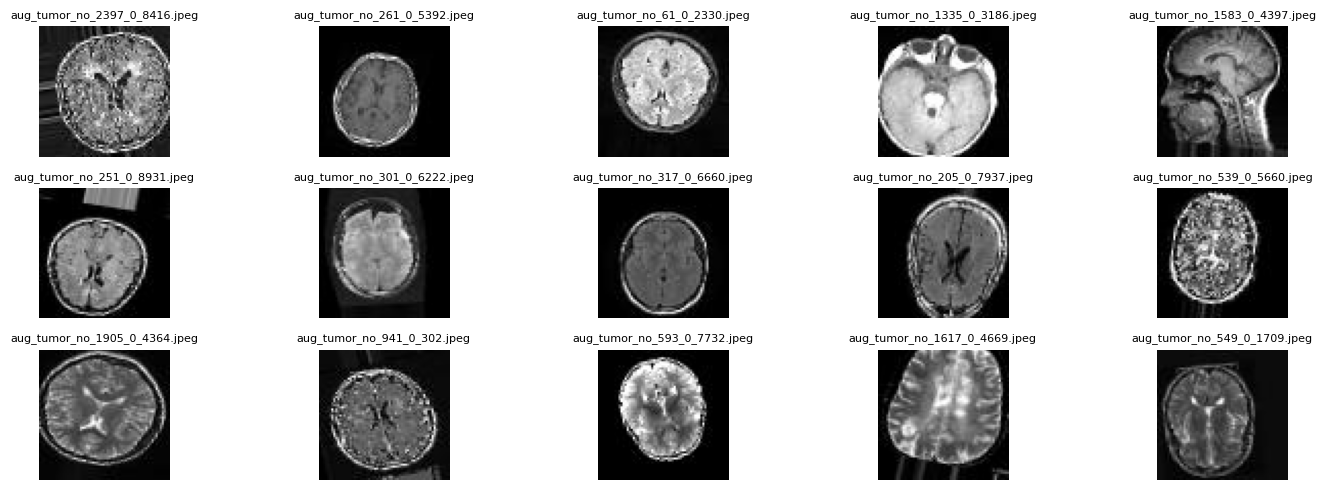

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random


augmented_folder = "/content/brain_disease_classification_dataset_v2/tumor_no"


aug_images = [img for img in os.listdir(augmented_folder) if img.startswith("aug_")]

# Show random 15 images for augmentation
sample_imgs = random.sample(aug_images, min(15, len(aug_images)))


plt.figure(figsize=(15, 5))
for idx, img_name in enumerate(sample_imgs):
    img_path = os.path.join(augmented_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 5, idx + 1)
    plt.imshow(img)
    plt.title(img_name, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


## 2.4 - Show Current Dataset

After the data augmentation, dataset was controlled and created table which are class and image count.

                          Class  Image Count      Group
5                     tumor_yes         6679      Tumor
4                      tumor_no         6000      Tumor
2        alzheimer_non_demented         3200  Alzheimer
1   alzheimer_moderate_demented         3000  Alzheimer
0       alzheimer_mild_demented         2501  Alzheimer
3  alzheimer_very_mild_demented         2240  Alzheimer


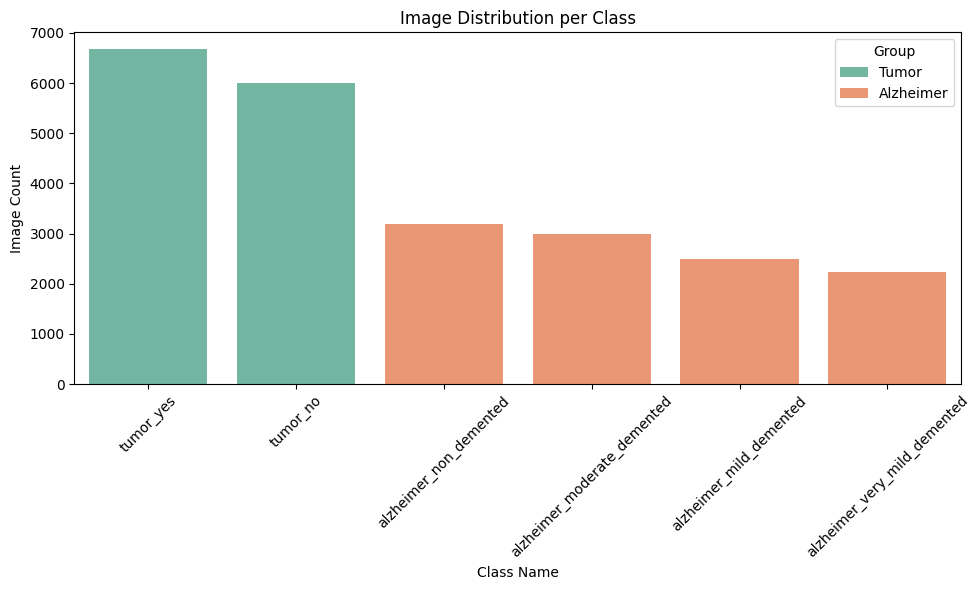

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


base_dir = "/content/brain_disease_classification_dataset_v2"


def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(image_files)
    return class_counts


class_counts = count_images_in_folders(base_dir)


tumor_counts = {k: v for k, v in class_counts.items() if k.startswith("tumor")}
alz_counts = {k: v for k, v in class_counts.items() if k.startswith("alzheimer")}


df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df["Group"] = df["Class"].apply(lambda x: "Tumor" if x.startswith("tumor") else "Alzheimer")
df = df.sort_values("Image Count", ascending=False)


print(df)


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Class", y="Image Count", hue="Group", dodge=False, palette="Set2")
plt.title("Image Distribution per Class")
plt.xlabel("Class Name")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.5 - Read, Resize and Convert Images to Arrays

In this project image size is used 64x64 (`IMG_SIZE = 64`) . Therefore, this code `img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))` resize all of images which are differents size.

In [ ]:
import os
import cv2
import numpy as np


DATASET_DIR = "/content/brain_disease_classification_dataset_v2"


all_classes = sorted(os.listdir(DATASET_DIR))
alzheimer_classes = [c for c in all_classes if c.startswith("alzheimer")]
tumor_classes = [c for c in all_classes if c.startswith("tumor")]


label_map = {}
for idx, label in enumerate(alzheimer_classes):
    label_map[label] = idx
for idx, label in enumerate(tumor_classes):
    label_map[label] = idx + len(alzheimer_classes)



IMG_SIZE = 64

X = []
y = []

for label in alzheimer_classes + tumor_classes:
    class_path = os.path.join(DATASET_DIR, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            X.append(img)
            y.append(label_map[label])


## 2.6 - Convert to NumPy Arrays

This code block makes the data types available for model training and normalizes the pixel values ​​of the images.

```
X = np.array(X, dtype='float32')
y = np.array(y)
```
Converts the Python lists X and y into NumPy arrays.

In [ ]:
X = np.array(X, dtype=np.float32)
y = np.array(y)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (23620, 64, 64, 3)
y shape: (23620,)


# **3 - Model Training & Evaluation**

In this section, CNN models are created and compared for **tumor and alzheimer dataset**.

*   3.1 - Split Data ( Train / Test )
*   3.2 - CNN Model
    *   3.2.1 - CNN Model Training
      *   3.2.1.1 - CNN Model - Training Visualization
      *   3.2.1.2 - CNN Model - Confusion Matrix
*   3.3 - VGG16 - Transfer Learning Model
    *   3.3.1 - VGG16 - Transfer Learning Model Training
      *   3.3.1.1 - VGG16 - Training Visualization
      *   3.3.1.2 - VGG16 - Confusion Matrix
*   3.4 - EfficientNetB0 Model
    *   3.4.1 - EfficientNetB0 Training
      *   3.4.1.1 - EfficientNetB0 - Training Visualization
      *   3.4.1.2 - EfficientNetB0 - Confusion Matrix
*   3.5 - ResNet50 - Transfer Learning Model
    *   3.5.1 - ResNet50 - Transfer Learning Model Training
      *   3.5.1.1 - ResNet50 - Training Visualization
      *   3.5.1.2 - ResNet50 - Confusion Matrix
*   3.5 - DenseNet121 - Transfer Learning Model
    *   3.5.1 - DenseNet121 - Transfer Learning Model Training
      *   3.5.1.1 - DenseNet121 - Training Visualization
      *   3.5.1.2 - DenseNet121 - Confusion Matrix
*   3.6 - Compare All Models

## 3.1 - Split the Data (Train / Test)

The train and test datasets are separated by 20%.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (18896, 64, 64, 3)
y_train shape: (18896,)


## 3.2 - CNN Model

Base cnn was created for first cnn model.


**CNN - Model Architecture**

```
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
```


*   `Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))` Aconvolutional layer with 32 filters of size 3x3 and ReLU activation.
*   `Conv2D(64, (3, 3), activation='relu')` Reduces spatial dimensions.

*   `Flatten()` Converts the 2D feature maps into a 1D vector for dense layers.

*    `Dense(128, activation='relu'),` A fully connected layer with 128 units and ReLU activation.

*     `Dropout(0.5)` Drops 50% of the neurons to prevent overfitting.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical


IMG_SIZE = 64
NUM_CLASSES = 6

if y_train.ndim != 2:
    y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
if y_test.ndim != 2:
    y_test = to_categorical(y_test, num_classes=NUM_CLASSES)


cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # 6 sınıf için
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**CNN - Model Compilation**

```
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
```

*   `optimizer='adam'` In this project the Adam optimization algorithm was preferred. Adam automatically adapts the learning rate for each parameter separately using first and second moment estimates. This leads to faster and more stable convergence during training.


In [ ]:
# Compile
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


**CNN - EarlyStopping**
```
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
```
Stops training if validation accuracy does not improve for 5 consecutive epochs. Recovers the best weights.


In [ ]:
# Callbacks
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

**CNN - Model Checkpoint**

```
model_checkpoint = ModelCheckpoint(
    filepath='best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)
```
Saves the model file with the best validation accuracy. The best validation accuracy was saved "**best_cnn_model_tumor.h5**" in this cnn model. This checkpoint will be used directly in the later stages of the project. There is no need to retrain the model each time it is run from the beginning.


In [ ]:
checkpoint = ModelCheckpoint(
    filepath='best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2.1 - CNN Model Training

**CNN - Time Calculation**

```
import time
start = time.time()


end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

```
Starts a timer to measure how long model training takes. After the training, stops the timer and prints total training time in seconds.


**CNN - Model Training**
```
history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)
```



*   `X_train, y_train,` Trains the CNN model using the training data.
*   `epochs=30, batch_size=32` Training was run for 30 epochs, and process 32 images at a time (batch size).
*   `callbacks=[early_stop,` This code can stops training if validation loss doesn’t improve for a few epochs.
*   `callbacks=[  ,model_checkpoint]` Saves the model with the best validation accuracy.
*   `verbose=1` Prints progress of training for each epoch.

In [ ]:
import time
start = time.time()

history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6130 - loss: 0.9061
Epoch 1: val_accuracy improved from -inf to 0.82790, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6131 - loss: 0.9057 - val_accuracy: 0.8279 - val_loss: 0.3825
Epoch 2/30
585/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8016 - loss: 0.4373
Epoch 2: val_accuracy improved from 0.82790 to 0.87341, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8018 - loss: 0.4370 - val_accuracy: 0.8734 - val_loss: 0.3016
Epoch 3/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8601 - loss: 0.3203
Epoch 3: val_accuracy improved from 0.87341 to 0.90749, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8601 - loss: 0.3203 - val_accuracy: 0.9075 - val_loss: 0.2390
Epoch 4/30
583/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8866 - loss: 0.2542
Epoch 4: val_accuracy improved from 0.90749 to 0.93078, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8866 - loss: 0.2542 - val_accuracy: 0.9308 - val_loss: 0.1898
Epoch 5/30
583/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9137 - loss: 0.2072
Epoch 5: val_accuracy improved from 0.93078 to 0.94941, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9137 - loss: 0.2072 - val_accuracy: 0.9494 - val_loss: 0.1396
Epoch 6/30
586/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9242 - loss: 0.1769
Epoch 6: val_accuracy improved from 0.94941 to 0.96041, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9242 - loss: 0.1769 - val_accuracy: 0.9604 - val_loss: 0.1216
Epoch 7/30
586/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9398 - loss: 0.1383
Epoch 7: val_accuracy improved from 0.96041 to 0.96211, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9398 - loss: 0.1383 - val_accuracy: 0.9621 - val_loss: 0.1102
Epoch 8/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9452 - loss: 0.1269
Epoch 8: val_accuracy improved from 0.96211 to 0.97206, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9452 - loss: 0.1269 - val_accuracy: 0.9721 - val_loss: 0.0937
Epoch 9/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9561 - loss: 0.1053
Epoch 9: val_accuracy improved from 0.97206 to 0.97481, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9561 - loss: 0.1053 - val_accuracy: 0.9748 - val_loss: 0.0817
Epoch 10/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9572 - loss: 0.1027
Epoch 10: val_accuracy did not improve from 0.97481
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9573 - loss: 0.1026 - val_accuracy: 0.9744 - val_loss: 0.0845
Epoch 11/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9619 - loss: 0.0893
Epoch 11: val_accuracy improved from 0.97481 to 0.97523, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9619 - loss: 0.0893 - val_accuracy: 0.9752 - val_loss: 0.0784
Epoch 12/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9700 - loss: 0.0783
Epoch 12: val_accuracy did not improve from 0.97523
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9700 - loss: 0.0783 - val_accuracy: 0.9644 - val_loss: 0.1150
Epoch 13/30
586/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9684 - loss: 0.0784
Epoch 13: val_accuracy improved from 0.97523 to 0.97777, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9684 - loss: 0.0785 - val_accuracy: 0.9778 - val_loss: 0.0852
Epoch 14/30
585/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9715 - loss: 0.0721
Epoch 14: val_accuracy did not improve from 0.97777
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9715 - loss: 0.0721 - val_accuracy: 0.9776 - val_loss: 0.0754
Epoch 15/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9731 - loss: 0.0631
Epoch 15: val_accuracy improved from 0.97777 to 0.97968, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9731 - loss: 0.0631 - val_accuracy: 0.9797 - val_loss: 0.0892
Epoch 16/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9764 - loss: 0.0576
Epoch 16: val_accuracy improved from 0.97968 to 0.98391, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9764 - loss: 0.0576 - val_accuracy: 0.9839 - val_loss: 0.0594
Epoch 17/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9776 - loss: 0.0589
Epoch 17: val_accuracy improved from 0.98391 to 0.98455, saving model to best_cnn_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9776 - loss: 0.0590 - val_accuracy: 0.9845 - val_loss: 0.0687
Epoch 18/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.0566
Epoch 18: val_accuracy did not improve from 0.98455
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9768 - loss: 0.0566 - val_accuracy: 0.9822 - val_loss: 0.0803
Epoch 19/30
584/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9802 - loss: 0.0538
Epoch 19: val_accuracy did not improve from 0.98455
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9801 - loss: 0.0539 - val_accuracy: 0.9807 - val_loss: 0.0758
Epoch 20/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9810 - loss: 0.0466
Epoch 20: val_accuracy did not improve from 0.98455
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9810 - loss: 0.0466 - val_accuracy: 0.9837 - val_loss: 0.0711
Epoch 21/30
583/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9809 - loss: 0.0494
Epoch 21: val_accuracy did n

**CNN Model Training Summary**

The model completed its learning in approximately 38 minutes. It completed the learning process in the 30th epoch and achieved the best result in the 26th epoch.

#### 3.2.1.1 CNN Model Training Visualization

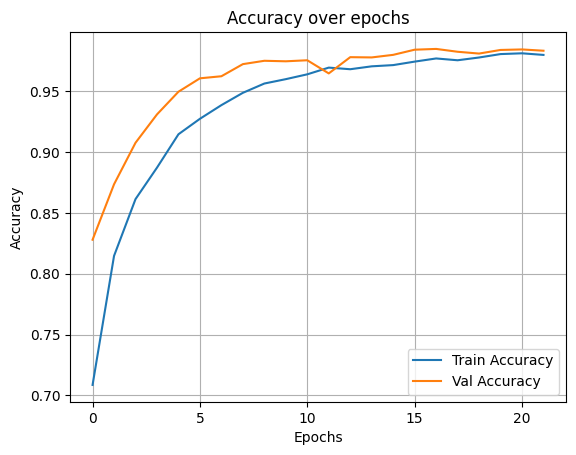

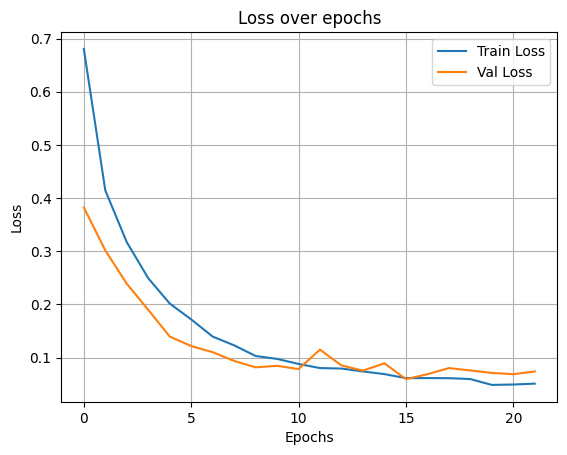

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


#### 3.3.1.2 Confusion Matrix for CNN Model

Confusion matrix was used for estimation calculation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model("best_cnn_model.h5")

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


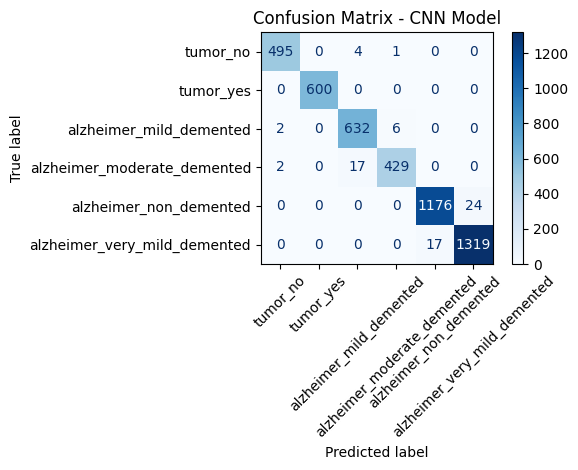

In [ ]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test


cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN Model")
plt.tight_layout()
plt.show()


## 3.3 - VGG16 - Transfer Learning Model

VGG16 Transfer Learning was created for another deep learning model.

**VGG16 - Model Architecture**
*   `base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))` Loads the VGG16 model pre-trained on ImageNet without the top layer. The input shape is set to 64x64 RGB images.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

input_shape = (64, 64, 3)
num_classes = 6

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


**VGG16 - Model Compilation**

In [ ]:
# Compile
model_vgg16.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**VGG16 - Earlystop**

In [ ]:
# Earlystop
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

**VGG16 - Model Checkpoint**

Saves the model file with the best validation accuracy. The best validation accuracy was saved "**best_vgg16_model_tumor.h5**" in this vgg16 model.

In [ ]:
# Model Checkpoint
checkpoint = ModelCheckpoint(
   'best_vgg16_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
model_vgg16.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,734 (57.14 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### 3.3.1 - VGG16 - Transfer Learning Model Training

**Model Training - Time Calculation**

In [ ]:
import time
start = time.time()

history_vgg16 = model_vgg16.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_45']
Received: inputs=Tensor(shape=(None, 64, 64, 3))
  warnings.warn(msg)


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4766 - loss: 1.2330
Epoch 1: val_accuracy improved from -inf to 0.69729, saving model to best_vgg16_model.keras
591/591 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.4767 - loss: 1.2326 - val_accuracy: 0.6973 - val_loss: 0.7632
Epoch 2/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6736 - loss: 0.7807
Epoch 2: val_accuracy improved from 0.69729 to 0.75127, saving model to best_vgg16_model.keras
591/591 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.6736 - loss: 0.7806 - val_accuracy: 0.7513 - val_loss: 0.6632
Epoch 3/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7081 - loss: 0.7057
Epoch 3: val_accuracy improved from 0.75127 to 0.77540, saving model to best_vgg16_model.keras
591/591 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7082 - loss: 0.7056 - val_accuracy: 0.7754 - val_loss: 0.5944
Epoch 4/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7421 - loss: 0.6389
Epoch 4: val_accuracy

#### 3.3.1.1 - VGG16 Model Training Visualization

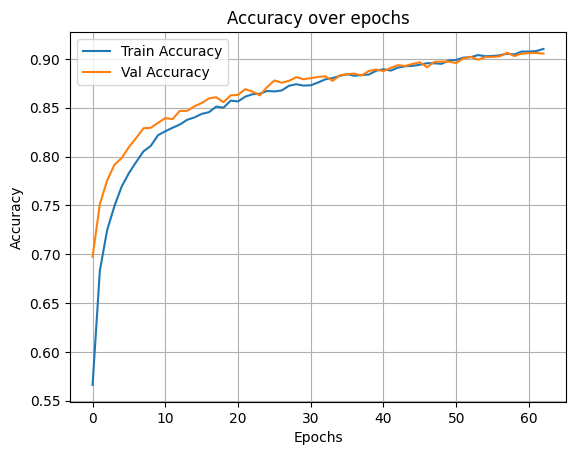

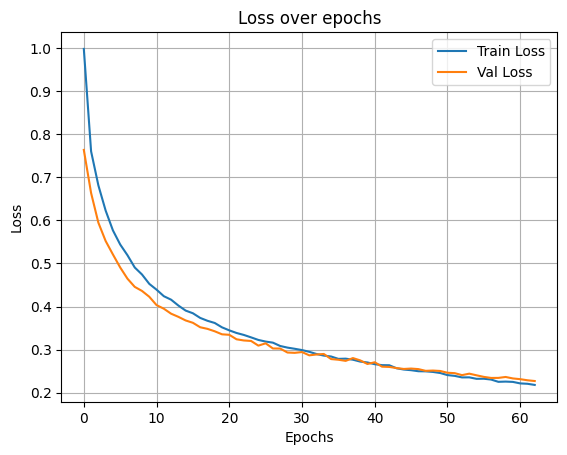

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.3.1.2  VGG16 Model Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model('/content/brain_disease_classification_dataset_v1/best_vgg16_model.keras')

148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


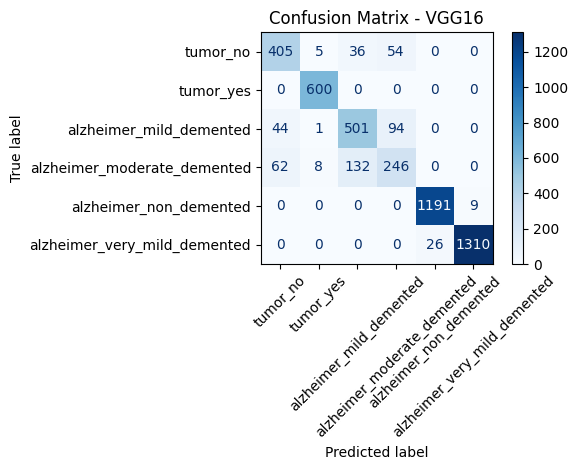

In [ ]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test


cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - VGG16")
plt.tight_layout()
plt.show()


## 3.4 - EfficientNetB0 - Transfer Learning Model and Training

EfficientNetB0 Transfer Learning was created for another deep learning model.

**EfficientNetB0  - Model Architecture**
*   `base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))` Loads the EfficientNetB0 model pre-trained on ImageNet without the top layer. The input shape is set to 64x64 RGB images.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


input_shape = (64, 64, 3)
num_classes = 6

# EfficientNetB0 base model
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)


model_efficientnet = Model(inputs=base_model.input, outputs=output)

**EfficientNetB0 - Model Compilation**

Adam optimizer was used but early stopping function stopped model training at epoch 6 and Epoch 1 was selected as the best model. Therefore, optimizer function was changed.

*   `learning_rate = 0.0001` learning rate value is decreased to increase learning.

In [ ]:
model_efficientnet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**EfficientNetB0 - Early Stop**

In [ ]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5,
                           restore_best_weights=True,
                           verbose=1)

**EfficientNetB0 - Checkpoint**

In [ ]:
# Checkpoint
checkpoint = ModelCheckpoint('best_effnet_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)


In [ ]:
model_efficientnet.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 64, 64, 3) │          0 │ input_layer_3[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 64, 64, 3) │          7 │ rescaling_2[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 64, 64, 3) │          0 │ normalization_1[… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 65, 65, 3) │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 32, 32,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 32, 32,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 32, 32,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 32, 32,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 32, 32,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 32, 32,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 32, 32,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 32, 32,    │        512 │ block1a_se_excit

 Total params: 4,214,313 (16.08 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### 3.4.1 - EfficientNetB0 - Training

**Model Training - Time Calculation**

In [ ]:
import time
start = time.time()

history_efficientnet = model_efficientnet.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2677 - loss: 1.7290
Epoch 1: val_accuracy improved from -inf to 0.28281, saving model to best_effnet_model.keras
591/591 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.2677 - loss: 1.7289 - val_accuracy: 0.2828 - val_loss: 1.6974
Epoch 2/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2782 - loss: 1.7066
Epoch 2: val_accuracy did not improve from 0.28281
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2782 - loss: 1.7066 - val_accuracy: 0.2828 - val_loss: 1.6954
Epoch 3/30
585/591 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2844 - loss: 1.7004
Epoch 3: val_accuracy did not improve from 0.28281
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2843 - loss: 1.7005 - val_accuracy: 0.2828 - val_loss: 1.6884
Epoch 4/30
586/591 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2797 - loss: 1.6969
Epoch 4: val_accuracy did not improve from 0.28281
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2

#### 3.4.1.1 - EfficientNetB0 Training Visualization

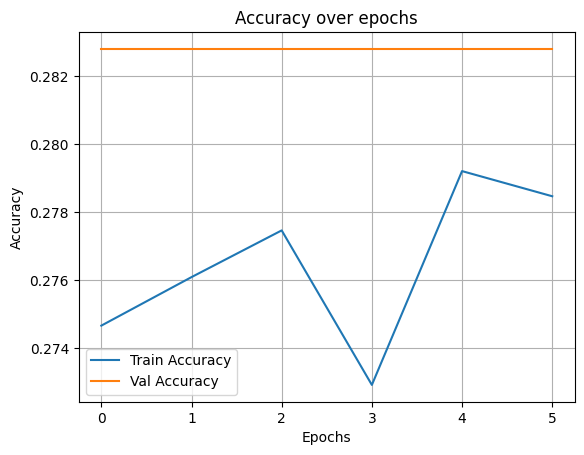

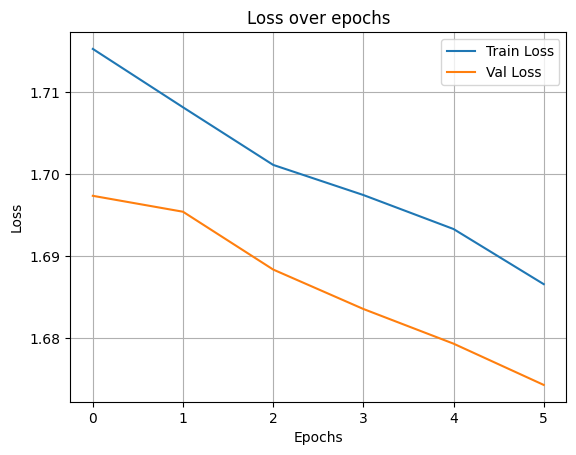

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_efficientnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_efficientnet.history['loss'], label='Train Loss')
plt.plot(history_efficientnet.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.4.1.2 - EfficientNetB0 Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model('/content/brain_disease_classification_dataset_v1/best_effnet_model.keras')

148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step


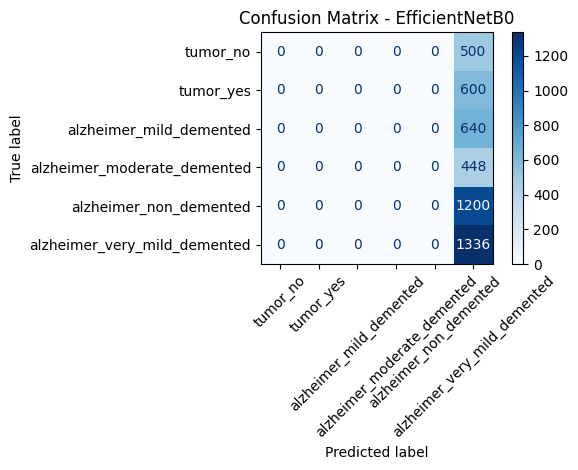

In [ ]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test


cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - EfficientNetB0")
plt.tight_layout()
plt.show()


## 3.5 - ResNet50 - Transfer Learning Model

 ResNet50 Transfer Learning was created for another deep learning model.

**ResNet50  - Model Architecture**
*   base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))` Loads the EfficientNetB0 model pre-trained on ImageNet without the top layer. The input shape is set to 64x64 RGB images.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


input_shape = (64, 64, 3)
num_classes = 6


base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model.input, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**ResNet50 - Model Compilation**

In [ ]:
model_resnet50.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**ResNet50 - Early Stop**

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

**ResNet50 - Checkpoint**

In [ ]:
checkpoint = ModelCheckpoint(
    'best_resnet50_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
model_resnet50.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,758 (90.98 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### 3.5.1 - ResNet50 - Transfer Learning Model Training

**Model Training - Time Calculation**

In [ ]:
import time
start = time.time()

history_resnet50 = model_resnet50.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2912 - loss: 1.6971
Epoch 1: val_accuracy improved from -inf to 0.43882, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.2913 - loss: 1.6967 - val_accuracy: 0.4388 - val_loss: 1.2365
Epoch 2/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4632 - loss: 1.2226
Epoch 2: val_accuracy improved from 0.43882 to 0.56732, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4633 - loss: 1.2223 - val_accuracy: 0.5673 - val_loss: 1.0744
Epoch 3/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5002 - loss: 1.1058
Epoch 3: val_accuracy improved from 0.56732 to 0.59187, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5003 - loss: 1.1056 - val_accuracy: 0.5919 - val_loss: 0.9991
Epoch 4/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5436 - loss: 1.0263
Epoch 4: val_accuracy improved from 0.59187 to 0.60838, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5437 - loss: 1.0262 - val_accuracy: 0.6084 - val_loss: 0.9527
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5664 - loss: 0.9829
Epoch 5: val_accuracy improved from 0.60838 to 0.61431, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5664 - loss: 0.9829 - val_accuracy: 0.6143 - val_loss: 0.9166
Epoch 6/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5930 - loss: 0.9370
Epoch 6: val_accuracy improved from 0.61431 to 0.62405, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5930 - loss: 0.9370 - val_accuracy: 0.6240 - val_loss: 0.8890
Epoch 7/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6042 - loss: 0.9147
Epoch 7: val_accuracy improved from 0.62405 to 0.63802, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6042 - loss: 0.9147 - val_accuracy: 0.6380 - val_loss: 0.8673
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6087 - loss: 0.8902
Epoch 8: val_accuracy improved from 0.63802 to 0.64416, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6087 - loss: 0.8902 - val_accuracy: 0.6442 - val_loss: 0.8435
Epoch 9/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6178 - loss: 0.8767
Epoch 9: val_accuracy improved from 0.64416 to 0.65453, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6179 - loss: 0.8766 - val_accuracy: 0.6545 - val_loss: 0.8277
Epoch 10/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6304 - loss: 0.8588
Epoch 10: val_accuracy did not improve from 0.65453
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6304 - loss: 0.8588 - val_accuracy: 0.6514 - val_loss: 0.8143
Epoch 11/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6314 - loss: 0.8445
Epoch 11: val_accuracy improved from 0.65453 to 0.66384, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6314 - loss: 0.8445 - val_accuracy: 0.6638 - val_loss: 0.7969
Epoch 12/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6431 - loss: 0.8263
Epoch 12: val_accuracy improved from 0.66384 to 0.66765, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6431 - loss: 0.8263 - val_accuracy: 0.6677 - val_loss: 0.7852
Epoch 13/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6538 - loss: 0.8101
Epoch 13: val_accuracy improved from 0.66765 to 0.67168, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6538 - loss: 0.8101 - val_accuracy: 0.6717 - val_loss: 0.7725
Epoch 14/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6571 - loss: 0.7993
Epoch 14: val_accuracy did not improve from 0.67168
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6571 - loss: 0.7993 - val_accuracy: 0.6696 - val_loss: 0.7604
Epoch 15/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6601 - loss: 0.7885
Epoch 15: val_accuracy improved from 0.67168 to 0.67655, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6602 - loss: 0.7885 - val_accuracy: 0.6765 - val_loss: 0.7520
Epoch 16/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6646 - loss: 0.7727
Epoch 16: val_accuracy improved from 0.67655 to 0.68417, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6646 - loss: 0.7727 - val_accuracy: 0.6842 - val_loss: 0.7412
Epoch 17/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6655 - loss: 0.7674
Epoch 17: val_accuracy improved from 0.68417 to 0.68819, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6655 - loss: 0.7673 - val_accuracy: 0.6882 - val_loss: 0.7301
Epoch 18/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6788 - loss: 0.7561
Epoch 18: val_accuracy did not improve from 0.68819
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6788 - loss: 0.7561 - val_accuracy: 0.6848 - val_loss: 0.7318
Epoch 19/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6720 - loss: 0.7526
Epoch 19: val_accuracy improved from 0.68819 to 0.68946, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6720 - loss: 0.7525 - val_accuracy: 0.6895 - val_loss: 0.7169
Epoch 20/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6815 - loss: 0.7370
Epoch 20: val_accuracy improved from 0.68946 to 0.69771, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6815 - loss: 0.7370 - val_accuracy: 0.6977 - val_loss: 0.7065
Epoch 21/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6908 - loss: 0.7214
Epoch 21: val_accuracy improved from 0.69771 to 0.70301, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6908 - loss: 0.7214 - val_accuracy: 0.7030 - val_loss: 0.6991
Epoch 22/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6952 - loss: 0.7227
Epoch 22: val_accuracy improved from 0.70301 to 0.70703, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6952 - loss: 0.7227 - val_accuracy: 0.7070 - val_loss: 0.6925
Epoch 23/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6937 - loss: 0.7145
Epoch 23: val_accuracy did not improve from 0.70703
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6936 - loss: 0.7145 - val_accuracy: 0.7030 - val_loss: 0.6857
Epoch 24/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6986 - loss: 0.7076
Epoch 24: val_accuracy improved from 0.70703 to 0.71571, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6986 - loss: 0.7076 - val_accuracy: 0.7157 - val_loss: 0.6811
Epoch 25/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7030 - loss: 0.7056
Epoch 25: val_accuracy did not improve from 0.71571
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7029 - loss: 0.7055 - val_accuracy: 0.7013 - val_loss: 0.6781
Epoch 26/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6978 - loss: 0.7026
Epoch 26: val_accuracy did not improve from 0.71571
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6978 - loss: 0.7026 - val_accuracy: 0.7096 - val_loss: 0.6713
Epoch 27/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7023 - loss: 0.6885
Epoch 27: val_accuracy did not improve from 0.71571
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7024 - loss: 0.6885 - val_accuracy: 0.7153 - val_loss: 0.6610
Epoch 28/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7124 - loss: 0.6832
Epoch 28: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7124 - loss: 0.6832 - val_accuracy: 0.7197 - val_loss: 0.6574
Epoch 29/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7094 - loss: 0.6808
Epoch 29: val_accuracy did not improve from 0.71973
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7094 - loss: 0.6808 - val_accuracy: 0.7168 - val_loss: 0.6529
Epoch 30/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7114 - loss: 0.6799
Epoch 30: val_accuracy did not improve from 0.71973
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7114 - loss: 0.6799 - val_accuracy: 0.7187 - val_loss: 0.6482
Epoch 31/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7164 - loss: 0.6614
Epoch 31: val_accuracy improved from 0.71973 to 0.72650, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7164 - loss: 0.6614 - val_accuracy: 0.7265 - val_loss: 0.6451
Epoch 32/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7149 - loss: 0.6634
Epoch 32: val_accuracy did not improve from 0.72650
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7148 - loss: 0.6635 - val_accuracy: 0.7202 - val_loss: 0.6398
Epoch 33/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7157 - loss: 0.6648
Epoch 33: val_accuracy did not improve from 0.72650
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7157 - loss: 0.6648 - val_accuracy: 0.7261 - val_loss: 0.6353
Epoch 34/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7147 - loss: 0.6604
Epoch 34: val_accuracy improved from 0.72650 to 0.73518, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7147 - loss: 0.6604 - val_accuracy: 0.7352 - val_loss: 0.6305
Epoch 35/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7241 - loss: 0.6490
Epoch 35: val_accuracy did not improve from 0.73518
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7241 - loss: 0.6490 - val_accuracy: 0.7348 - val_loss: 0.6305
Epoch 36/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7275 - loss: 0.6444
Epoch 36: val_accuracy did not improve from 0.73518
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7275 - loss: 0.6445 - val_accuracy: 0.7350 - val_loss: 0.6234
Epoch 37/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7220 - loss: 0.6411
Epoch 37: val_accuracy did not improve from 0.73518
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7220 - loss: 0.6411 - val_accuracy: 0.7341 - val_loss: 0.6225
Epoch 38/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7300 - loss: 0.6389
Epoch 38: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7300 - loss: 0.6389 - val_accuracy: 0.7377 - val_loss: 0.6170
Epoch 39/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7253 - loss: 0.6343
Epoch 39: val_accuracy improved from 0.73772 to 0.73899, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7253 - loss: 0.6343 - val_accuracy: 0.7390 - val_loss: 0.6144
Epoch 40/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7234 - loss: 0.6366
Epoch 40: val_accuracy did not improve from 0.73899
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7234 - loss: 0.6366 - val_accuracy: 0.7377 - val_loss: 0.6110
Epoch 41/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7372 - loss: 0.6214
Epoch 41: val_accuracy improved from 0.73899 to 0.74132, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7372 - loss: 0.6214 - val_accuracy: 0.7413 - val_loss: 0.6105
Epoch 42/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7344 - loss: 0.6223
Epoch 42: val_accuracy improved from 0.74132 to 0.74217, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7344 - loss: 0.6223 - val_accuracy: 0.7422 - val_loss: 0.6046
Epoch 43/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7272 - loss: 0.6253
Epoch 43: val_accuracy improved from 0.74217 to 0.74598, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7272 - loss: 0.6253 - val_accuracy: 0.7460 - val_loss: 0.5996
Epoch 44/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7355 - loss: 0.6174
Epoch 44: val_accuracy did not improve from 0.74598
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7355 - loss: 0.6174 - val_accuracy: 0.7436 - val_loss: 0.5988
Epoch 45/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7328 - loss: 0.6167
Epoch 45: val_accuracy improved from 0.74598 to 0.74936, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7328 - loss: 0.6167 - val_accuracy: 0.7494 - val_loss: 0.5980
Epoch 46/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7376 - loss: 0.6107
Epoch 46: val_accuracy improved from 0.74936 to 0.74958, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7376 - loss: 0.6107 - val_accuracy: 0.7496 - val_loss: 0.5946
Epoch 47/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7412 - loss: 0.6083
Epoch 47: val_accuracy improved from 0.74958 to 0.75000, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7412 - loss: 0.6083 - val_accuracy: 0.7500 - val_loss: 0.5905
Epoch 48/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7420 - loss: 0.6027
Epoch 48: val_accuracy did not improve from 0.75000
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7420 - loss: 0.6027 - val_accuracy: 0.7489 - val_loss: 0.5890
Epoch 49/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7358 - loss: 0.6223
Epoch 49: val_accuracy did not improve from 0.75000
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7358 - loss: 0.6222 - val_accuracy: 0.7479 - val_loss: 0.5858
Epoch 50/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7453 - loss: 0.5973
Epoch 50: val_accuracy improved from 0.75000 to 0.75318, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7452 - loss: 0.5973 - val_accuracy: 0.7532 - val_loss: 0.5819
Epoch 51/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7457 - loss: 0.5947
Epoch 51: val_accuracy improved from 0.75318 to 0.75339, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7457 - loss: 0.5947 - val_accuracy: 0.7534 - val_loss: 0.5806
Epoch 52/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7476 - loss: 0.5857
Epoch 52: val_accuracy improved from 0.75339 to 0.75550, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7476 - loss: 0.5857 - val_accuracy: 0.7555 - val_loss: 0.5783
Epoch 53/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7462 - loss: 0.5978
Epoch 53: val_accuracy did not improve from 0.75550
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7462 - loss: 0.5978 - val_accuracy: 0.7536 - val_loss: 0.5775
Epoch 54/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7480 - loss: 0.5932
Epoch 54: val_accuracy did not improve from 0.75550
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7480 - loss: 0.5932 - val_accuracy: 0.7542 - val_loss: 0.5740
Epoch 55/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7427 - loss: 0.5903
Epoch 55: val_accuracy did not improve from 0.75550
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7428 - loss: 0.5903 - val_accuracy: 0.7538 - val_loss: 0.5742
Epoch 56/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7439 - loss: 0.5896
Epoch 56: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7439 - loss: 0.5896 - val_accuracy: 0.7599 - val_loss: 0.5684
Epoch 57/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7488 - loss: 0.5859
Epoch 57: val_accuracy did not improve from 0.75995
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7488 - loss: 0.5859 - val_accuracy: 0.7595 - val_loss: 0.5668
Epoch 58/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7515 - loss: 0.5794
Epoch 58: val_accuracy improved from 0.75995 to 0.76101, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7515 - loss: 0.5795 - val_accuracy: 0.7610 - val_loss: 0.5670
Epoch 59/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7519 - loss: 0.5745
Epoch 59: val_accuracy improved from 0.76101 to 0.76228, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7519 - loss: 0.5745 - val_accuracy: 0.7623 - val_loss: 0.5646
Epoch 60/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7472 - loss: 0.5825
Epoch 60: val_accuracy did not improve from 0.76228
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7472 - loss: 0.5825 - val_accuracy: 0.7606 - val_loss: 0.5623
Epoch 61/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7554 - loss: 0.5753
Epoch 61: val_accuracy improved from 0.76228 to 0.76312, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7554 - loss: 0.5753 - val_accuracy: 0.7631 - val_loss: 0.5638
Epoch 62/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7497 - loss: 0.5745
Epoch 62: val_accuracy improved from 0.76312 to 0.76418, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7497 - loss: 0.5745 - val_accuracy: 0.7642 - val_loss: 0.5575
Epoch 63/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7548 - loss: 0.5747
Epoch 63: val_accuracy improved from 0.76418 to 0.76566, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7548 - loss: 0.5747 - val_accuracy: 0.7657 - val_loss: 0.5577
Epoch 64/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7480 - loss: 0.5731
Epoch 64: val_accuracy did not improve from 0.76566
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7480 - loss: 0.5731 - val_accuracy: 0.7625 - val_loss: 0.5532
Epoch 65/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7552 - loss: 0.5694
Epoch 65: val_accuracy did not improve from 0.76566
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7552 - loss: 0.5694 - val_accuracy: 0.7638 - val_loss: 0.5510
Epoch 66/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7545 - loss: 0.5712
Epoch 66: val_accuracy did not improve from 0.76566
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7545 - loss: 0.5712 - val_accuracy: 0.7650 - val_loss: 0.5515
Epoch 67/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7583 - loss: 0.5642
Epoch 67: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7583 - loss: 0.5642 - val_accuracy: 0.7705 - val_loss: 0.5493
Epoch 68/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7554 - loss: 0.5625
Epoch 68: val_accuracy did not improve from 0.77053
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7554 - loss: 0.5625 - val_accuracy: 0.7682 - val_loss: 0.5480
Epoch 69/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7604 - loss: 0.5604
Epoch 69: val_accuracy did not improve from 0.77053
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7604 - loss: 0.5604 - val_accuracy: 0.7703 - val_loss: 0.5488
Epoch 70/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7577 - loss: 0.5581
Epoch 70: val_accuracy did not improve from 0.77053
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7577 - loss: 0.5581 - val_accuracy: 0.7629 - val_loss: 0.5484
Epoch 71/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7644 - loss: 0.5544
Epoch 71: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7625 - loss: 0.5498 - val_accuracy: 0.7712 - val_loss: 0.5412
Epoch 74/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7672 - loss: 0.5525
Epoch 74: val_accuracy improved from 0.77117 to 0.77519, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7672 - loss: 0.5525 - val_accuracy: 0.7752 - val_loss: 0.5364
Epoch 75/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7549 - loss: 0.5563
Epoch 75: val_accuracy did not improve from 0.77519
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7549 - loss: 0.5563 - val_accuracy: 0.7712 - val_loss: 0.5407
Epoch 76/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7636 - loss: 0.5468
Epoch 76: val_accuracy did not improve from 0.77519
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7636 - loss: 0.5468 - val_accuracy: 0.7743 - val_loss: 0.5360
Epoch 77/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7661 - loss: 0.5495
Epoch 77: val_accuracy did not improve from 0.77519
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7661 - loss: 0.5495 - val_accuracy: 0.7716 - val_loss: 0.5348
Epoch 78/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7640 - loss: 0.5476
Epoch 78: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7641 - loss: 0.5426 - val_accuracy: 0.7767 - val_loss: 0.5322
Epoch 80/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7679 - loss: 0.5489
Epoch 80: val_accuracy did not improve from 0.77667
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7678 - loss: 0.5488 - val_accuracy: 0.7655 - val_loss: 0.5385
Epoch 81/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7704 - loss: 0.5459
Epoch 81: val_accuracy did not improve from 0.77667
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7704 - loss: 0.5459 - val_accuracy: 0.7741 - val_loss: 0.5312
Epoch 82/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7630 - loss: 0.5460
Epoch 82: val_accuracy did not improve from 0.77667
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7630 - loss: 0.5459 - val_accuracy: 0.7731 - val_loss: 0.5310
Epoch 83/100
587/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7726 - loss: 0.5341
Epoch 83: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7703 - loss: 0.5323 - val_accuracy: 0.7771 - val_loss: 0.5276
Epoch 85/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7681 - loss: 0.5398
Epoch 85: val_accuracy did not improve from 0.77710
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7681 - loss: 0.5398 - val_accuracy: 0.7733 - val_loss: 0.5306
Epoch 86/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7638 - loss: 0.5367
Epoch 86: val_accuracy did not improve from 0.77710
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7638 - loss: 0.5367 - val_accuracy: 0.7746 - val_loss: 0.5247
Epoch 87/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7782 - loss: 0.5220
Epoch 87: val_accuracy improved from 0.77710 to 0.77900, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7782 - loss: 0.5220 - val_accuracy: 0.7790 - val_loss: 0.5242
Epoch 88/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7688 - loss: 0.5347
Epoch 88: val_accuracy did not improve from 0.77900
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7688 - loss: 0.5347 - val_accuracy: 0.7786 - val_loss: 0.5212
Epoch 89/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7757 - loss: 0.5268
Epoch 89: val_accuracy improved from 0.77900 to 0.78133, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7757 - loss: 0.5268 - val_accuracy: 0.7813 - val_loss: 0.5192
Epoch 90/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7697 - loss: 0.5310
Epoch 90: val_accuracy did not improve from 0.78133
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7697 - loss: 0.5310 - val_accuracy: 0.7771 - val_loss: 0.5210
Epoch 91/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7754 - loss: 0.5266
Epoch 91: val_accuracy did not improve from 0.78133
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7753 - loss: 0.5266 - val_accuracy: 0.7760 - val_loss: 0.5195
Epoch 92/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7771 - loss: 0.5244
Epoch 92: val_accuracy did not improve from 0.78133
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7771 - loss: 0.5244 - val_accuracy: 0.7803 - val_loss: 0.5173
Epoch 93/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7749 - loss: 0.5215
Epoch 93: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7749 - loss: 0.5215 - val_accuracy: 0.7818 - val_loss: 0.5140
Epoch 94/100
589/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7711 - loss: 0.5243
Epoch 94: val_accuracy improved from 0.78175 to 0.78514, saving model to best_resnet50_model.h5


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7711 - loss: 0.5243 - val_accuracy: 0.7851 - val_loss: 0.5124
Epoch 95/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7793 - loss: 0.5174
Epoch 95: val_accuracy did not improve from 0.78514
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7792 - loss: 0.5174 - val_accuracy: 0.7809 - val_loss: 0.5136
Epoch 96/100
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7691 - loss: 0.5249
Epoch 96: val_accuracy did not improve from 0.78514
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7691 - loss: 0.5249 - val_accuracy: 0.7837 - val_loss: 0.5120
Epoch 97/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7786 - loss: 0.5163
Epoch 97: val_accuracy did not improve from 0.78514
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7785 - loss: 0.5163 - val_accuracy: 0.7828 - val_loss: 0.5131
Epoch 98/100
590/591 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7807 - loss: 0.5179
Epoch 98: val_a

591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7792 - loss: 0.5147 - val_accuracy: 0.7860 - val_loss: 0.5077
Restoring model weights from the end of the best epoch: 100.
Training time: 16 minutes 16 seconds


#### 3.5.1.1 - ResNet50 Training Visualization

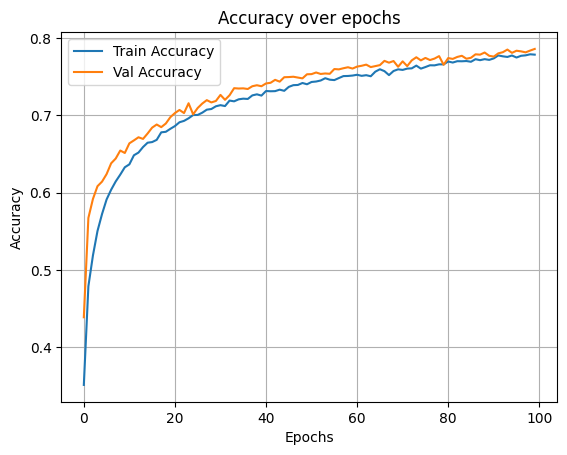

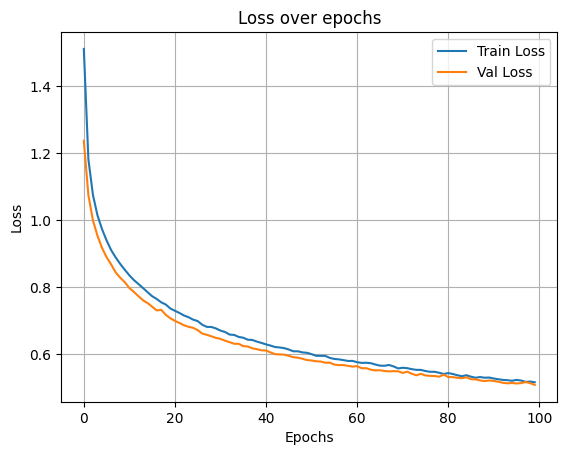

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.5.1.2 - ResNet50 Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model('/content/brain_disease_classification_dataset_v1/best_resnet50_model.h5')

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step


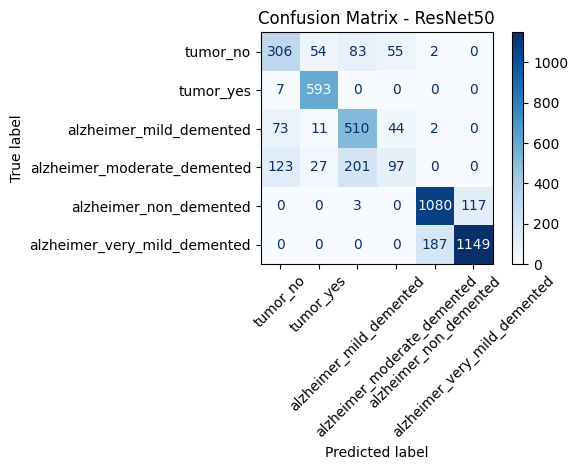

In [ ]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ResNet50")
plt.tight_layout()
plt.show()


## 3.6 - DenseNet121 - Transfer Learning Model

DenseNet121 Transfer Learning was created for another deep learning model.

**DenseNet121  - Model Architecture**
*   base_model = DenseNet121(include_top=False,   weights='imagenet',input_shape=input_shape)` Loads the DenseNet121 model pre-trained on ImageNet without the top layer. The input shape is set to 64x64 RGB images.

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


input_shape = (64, 64, 3)
num_classes = 6


base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)


model_densenet121 = Model(inputs=base_model.input, outputs=output)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**DenseNet121 - Model Compilation**

In [ ]:
# Compile
model_densenet121.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # veya sparse_categorical_crossentropy
    metrics=['accuracy']
)

**DenseNet121 - EarlyStop**

In [ ]:
# EarlyStop
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5,
                           restore_best_weights=True,
                           verbose=1)

**DenseNet121 - Checkpoint**

In [ ]:
# Checkpoint
checkpoint = ModelCheckpoint('best_densenet121_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)

In [ ]:
model_densenet121.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 70, 70, 3) │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 16, 16,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 16, 16,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 16, 16,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 16, 16,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 16, 16,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 16, 16,    │     12,288 │ conv2_block2_0_r

 Total params: 7,169,478 (27.35 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

### 3.6.1 - DenseNet121 - Transfer Learning Model Training

**Model Training - Time Calculation**

In [ ]:
import time
start = time.time()

history_densenet121 = model_densenet121.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/100
1177/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5054 - loss: 1.6050
Epoch 1: val_accuracy improved from -inf to 0.74132, saving model to best_densenet121_model.keras
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.5057 - loss: 1.6030 - val_accuracy: 0.7413 - val_loss: 0.7005
Epoch 2/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6866 - loss: 0.7732
Epoch 2: val_accuracy improved from 0.74132 to 0.78133, saving model to best_densenet121_model.keras
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.6867 - loss: 0.7731 - val_accuracy: 0.7813 - val_loss: 0.5773
Epoch 3/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7376 - loss: 0.6441
Epoch 3: val_accuracy improved from 0.78133 to 0.80165, saving model to best_densenet121_model.keras
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.7376 - loss: 0.6441 - val_accuracy: 0.8017 - val_loss: 0.5090
Epoch 4/100
1179/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy:

#### 3.6.1.1 - DenseNet121 Training Visualization

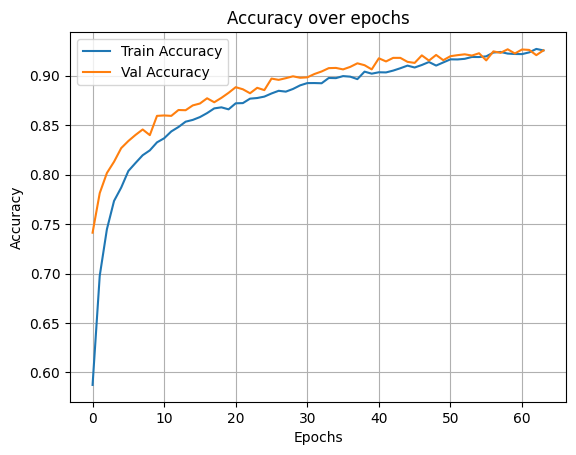

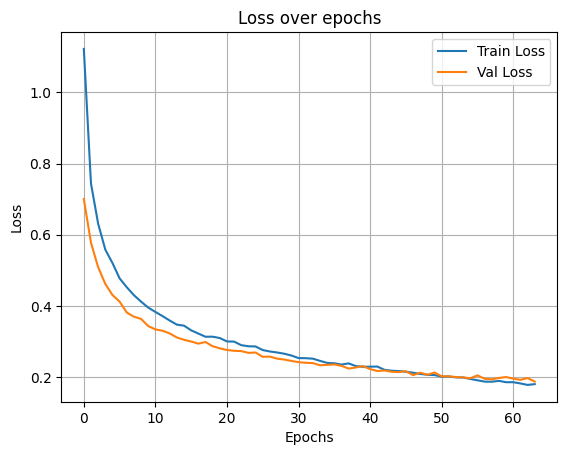

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_densenet121.history['accuracy'], label='Train Accuracy')
plt.plot(history_densenet121.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_densenet121.history['loss'], label='Train Loss')
plt.plot(history_densenet121.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.6.1.2 - DenseNet121 Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model('/content/brain_disease_classification_dataset_v1/best_densenet121_model.keras')

148/148 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step


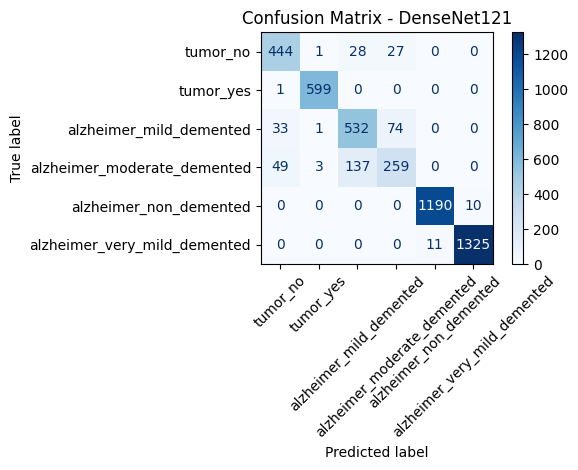

In [ ]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - DenseNet121")
plt.tight_layout()
plt.show()


## 3.6 - Compare All Models

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model

model_paths = {
    'CNN': '/content/brain_disease_classification_dataset_v1/best_cnn_model.h5',
    'VGG16': '/content/brain_disease_classification_dataset_v1/best_vgg16_model_tumor.keras',
    'EfficientNet': '/content/brain_disease_classification_dataset_v1/best_effnet_model_model_tumor.keras',
    'ResNet50': '/content/brain_disease_classification_dataset_v1/best_resnet50_model_tumor.h5',
    'DenseNet121': '/content/brain_disease_classification_dataset_v1/best_densenet121_model_tumor.keras'
}

In [ ]:
model_histories = {
    'CNN': history_cnn,
    'VGG16': history_vgg16,
    'EfficientNet': history_efficientnet,
    'ResNet50': history_resnet50,
    'DenseNet121': history_densenet121
}

In [ ]:
model_comparisons = []

for model_name, model_path in model_paths.items():

    history = model_histories[model_name].history

    accuracy = round(history.get('accuracy', ['N/A'])[-1], 3)
    loss =  round(history.get('loss', ['N/A'])[-1], 3)
    val_accuracy = round(history.get('val_accuracy', ['N/A'])[-1], 3)
    val_loss = round(history.get('val_loss', ['N/A'])[-1], 3)

    if model_name == 'CNN':
        training_time = '1 minutes 14 seconds'
    elif model_name == 'VGG16':
        training_time = '14 minutes 36 seconds'
    elif model_name == 'EfficientNet':
        training_time = '1 minutes 10 seconds'
    elif model_name == 'ResNet50':
        training_time = '16 minutes 34 seconds'
    elif model_name == 'DenseNet121':
        training_time = '15 minutes 59 seconds'

    model_comparisons.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Loss': loss,
        'Validation Accuracy': val_accuracy,
        'Validation Loss': val_loss,
        'Training Time (m)': training_time
    })

    df_comparison = pd.DataFrame(model_comparisons)

display(df_comparison)

,Model,Accuracy,Loss,Validation Accuracy,Validation Loss,Training Time (m)
0,CNN,0.980,0.051,0.983,0.074,1 minutes 14 seconds
1,VGG16,0.910,0.218,0.905,0.227,14 minutes 36 seconds
2,EfficientNet,0.278,1.687,0.283,1.674,1 minutes 10 seconds
3,ResNet50,0.779,0.516,0.786,0.508,16 minutes 34 seconds
4,DenseNet121,0.926,0.181,0.926,0.188,15 minutes 59 seconds


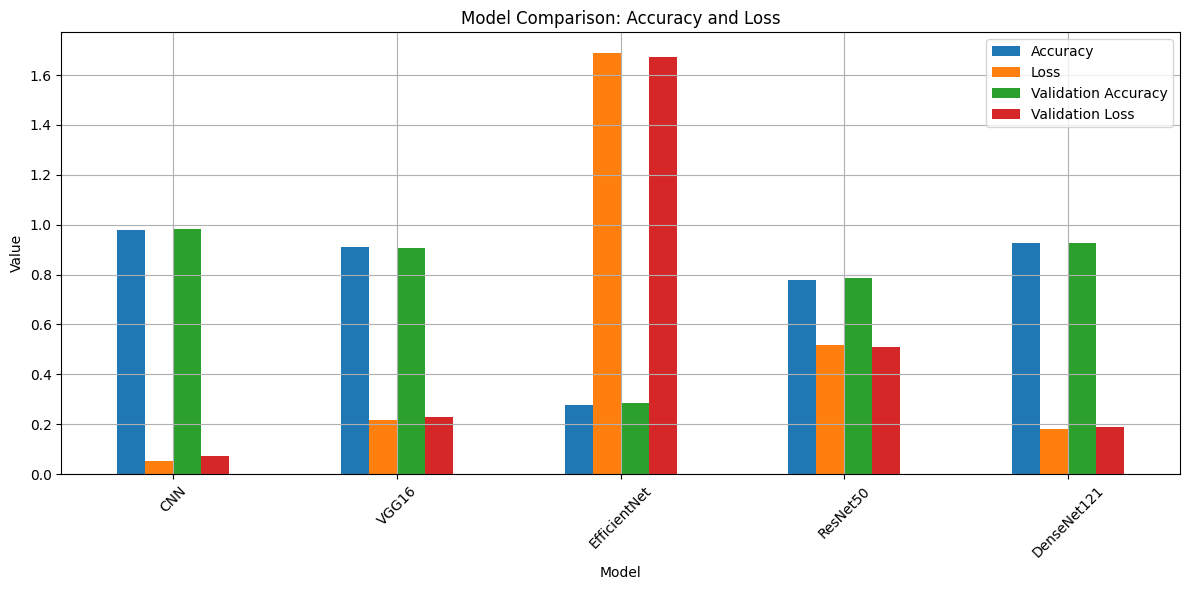

In [ ]:
df_comparison.set_index('Model')[['Accuracy', 'Loss', 'Validation Accuracy','Validation Loss']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison: Accuracy and Loss")
plt.ylabel("Value")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4 - Prediction

**Extract Test Images**

In [14]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/brain_disease_classification_dataset_v1/test_images.zip"
extract_path = "/content/test_images"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)


Dataset successfully extracted to: /content/test_images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


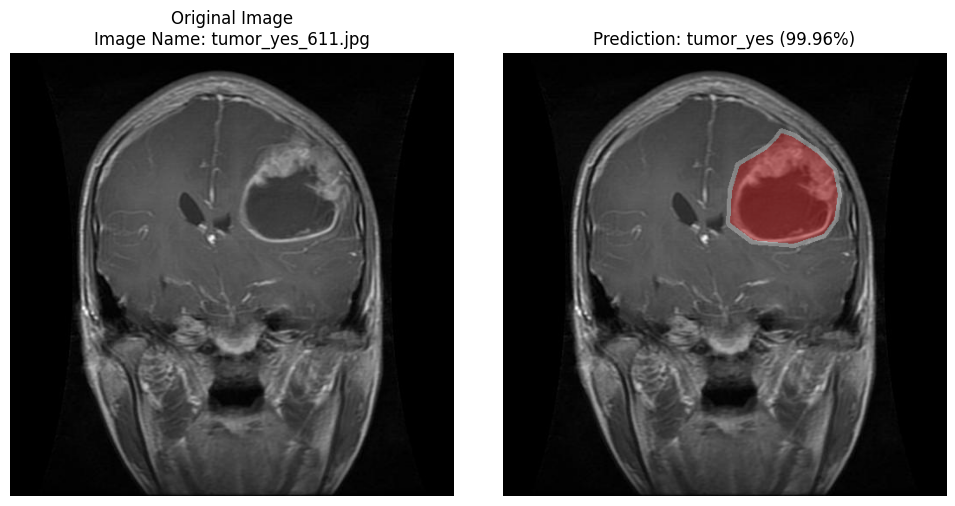

In [57]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import json
import cv2


class_names = [
    'alzheimer_mild_demented',
    'alzheimer_moderate_demented',
    'alzheimer_non_demented',
    'alzheimer_very_mild_demented',
    'tumor_no',
    'tumor_yes'
]


img_dir = '/content/test_images'
json_path = '/content/test_images/json_file'


all_images = [f for f in os.listdir(img_dir) if f.lower().endswith('.jpg')]
assert all_images, "Not Found Images"


img_name = random.choice(all_images)
img_path = os.path.join(img_dir, img_name)


json_file = img_name.replace('.jpg', '.json')
json_file_path = os.path.join(json_path, json_file)
json_exists = os.path.exists(json_file_path)


img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
input_img = np.expand_dims(img_array, axis=0)

model = load_model('/content/brain_disease_classification_dataset_v1/best_vgg16_model.keras')


pred_probs = model.predict(input_img)
pred_index = np.argmax(pred_probs)
pred_label = class_names[pred_index]
confidence = pred_probs[0][pred_index]


img_original = cv2.imread(img_path)
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_with_boxes = img_original_rgb.copy()

if json_exists and pred_label == "tumor_yes":
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    overlay = img_with_boxes.copy()
    for shape in data.get("shapes", []):
        if shape.get("label") == "tumor_yes" and shape.get("shape_type") == "polygon":
            points = shape.get("points", [])
            pts = np.array(points, dtype=np.int32).reshape((-1, 1, 2))


            cv2.fillPoly(overlay, [pts], color=(255, 0, 0))


            cv2.polylines(overlay, [pts], isClosed=True, color=(255, 255, 255), thickness=3)

    alpha = 0.3
    img_with_boxes = cv2.addWeighted(overlay, alpha, img_with_boxes, 1 - alpha, 0)


plt.figure(figsize=(10, 5))

#Original Image.
plt.subplot(1, 2, 1)
plt.imshow(img_original_rgb)
plt.title(f"Original Image\nImage Name: {img_name}")
plt.axis('off')

#Predic Image
plt.subplot(1, 2, 2)
plt.imshow(img_with_boxes)
plt.title(f"Prediction: {pred_label} ({confidence*100:.2f}%)")
plt.axis('off')

plt.tight_layout()
plt.show()